In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, svm
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [51]:
# 定义逻辑回归函数
def sigm(X, theta):
    return 1./(1.+ np.exp(-np.dot(X, theta)))

In [11]:
# 整体参数设置
m = 100   # 样本量
xlim = 4  # 数据采样范围
n = 2     # 特征变量个数

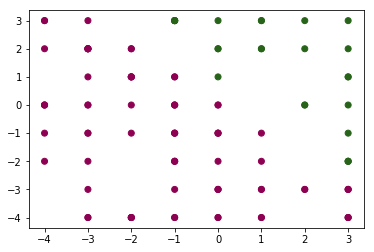

In [16]:
# 训练集
np.random.seed(20180824)
train_x1 = np.random.randint(-xlim, xlim, m).reshape(m, 1)
train_x2 = np.random.randint(-xlim, xlim, m).reshape(m, 1)

Theta = np.ones(n).reshape(n, 1)
train_X = np.hstack((train_x1, train_x2))
train_y = np.round(sigm(train_X, Theta))

_ = plt.scatter(train_x1, train_x2, c=train_y, cmap='PiYG')

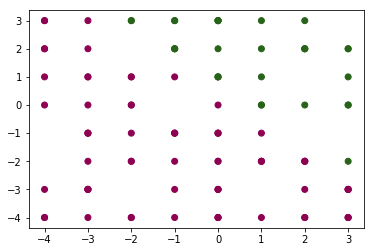

In [17]:
# 测试集
np.random.seed(20180823)
test_x1 = np.random.randint(-xlim, xlim, m).reshape(m, 1)
test_x2 = np.random.randint(-xlim, xlim, m).reshape(m, 1)

Theta = np.ones(n).reshape(n, 1)
test_X = np.hstack((test_x1, test_x2))
test_y = np.round(sigm(test_X, Theta))

_ = plt.scatter(test_x1, test_x2, c=test_y, cmap='PiYG')

In [46]:
# 用逻辑回归进行训练
clf = linear_model.LogisticRegression()
_ = clf.fit(train_X, train_y.ravel())
y_ = clf.predict(test_X)
y_ = np.round(y_).reshape(100, 1)

### 分界线
- 这里训练集有两个特征，设为$x_1, x_2$，那么经过训练之后，逻辑回归算法将会拟合出三个参数$\theta_0, \theta_1, \theta_2$
- 这些特征和参数的关系就是：$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$ 这条直线就是分界线，如下图：

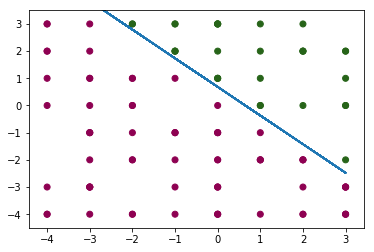

In [50]:
t1, t2 = clf.coef_.ravel()
t0 = clf.intercept_

border_line = -(t0/t2 + t1/t2*test_x1)
_ = plt.plot(test_x1, border_line)
_ = plt.scatter(test_x1, test_x2, c=y_, cmap='PiYG')
_ = plt.ylim(-4.5, 3.5)

In [49]:
clf.score(test_X, test_y)
((test_y - y_)**2).sum()

1.0

0.0